<a href="https://colab.research.google.com/github/mb8655/Python/blob/main/Pandas_basic_data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the necessary libraries

In [57]:
!pip3 install -U -q PyMySQL sqlalchemy

In [58]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
#render plors in high resolution
%config InlineBackend.figure_format = 'retina'

In [60]:
# increase the size of the graphs
matplotlib.style.use(['seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-whitegrid'])

In [61]:
#read data using sql from MySQL server
import os
from sqlalchemy import create_engine
from sqlalchemy import text
from sqlite3.dbapi2 import connect

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org',
    user = 'student',
    password = 'dwdstudent2015',
    db = 'doh_restaurants',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)

In [62]:
import os
from sqlalchemy import create_engine
from sqlalchemy import text

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org',
    user = 'student',
    password = 'dwdstudent2025',
    db = 'doh_restaurants',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)

In [63]:
# sql to return restaurants

sql = '''
        SELECT R.CAMIS, R.DBA, R.BUILDING, R.STREET, R.ZIPCODE,
            R.BORO, R.CUISINE_DESCRIPTION, R.LATITUDE, R.LONGITUDE, R.NTA
        FROM restaurants R
'''

with engine.connect() as connection:
    restaurants = pd.read_sql(text(sql), con=connection)

print(restaurants)

          CAMIS                             DBA BUILDING              STREET  \
0      30075445           MORRIS PARK BAKE SHOP     1007  MORRIS PARK AVENUE   
1      30112340                         WENDY'S      469     FLATBUSH AVENUE   
2      30191841  DJ REYNOLDS PUB AND RESTAURANT      351    WEST   57 STREET   
3      40356018                RIVIERA CATERERS     2780    STILLWELL AVENUE   
4      40356483              WILKEN'S FINE FOOD     7114            AVENUE U   
...         ...                             ...      ...                 ...   
19737  50144964                    Chen Express      223    EAST   14 STREET   
19738  50145448                   LA BOMBONIERA     1378    LEXINGTON AVENUE   
19739  50146152                            PRET        1         ASTOR PLACE   
19740  50146220              TAQUERIA EL TANQUE      260        BROOK AVENUE   
19741  50146853               Cafe Espresso Bar      210           KINGS HWY   

      ZIPCODE       BORO             CU

In [64]:
# sql to return inspections of each restaurant
sql = '''
        SELECT R.CAMIS, R.DBA, R.ZIPCODE, R.BORO, R.CUISINE_DESCRIPTION, R.NTA,
            I.INSPECTION_DATE, I.INSPECTION_ID, I.INSPECTION_TYPE, I.SCORE, I.GRADE
        FROM restaurants R
           JOIN inspections I
           ON I.CAMIS = R.CAMIS
'''

with engine.connect() as connection:
    inspections = pd.read_sql(text(sql), con=connection)

print(inspections)

          CAMIS                    DBA ZIPCODE       BORO  \
0      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
1      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
2      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
3      30075445  MORRIS PARK BAKE SHOP   10462      Bronx   
4      30112340                WENDY'S   11225   Brooklyn   
...         ...                    ...     ...        ...   
47634  50144964           Chen Express   10003  Manhattan   
47635  50145448          LA BOMBONIERA   10128  Manhattan   
47636  50146152                   PRET   10003  Manhattan   
47637  50146220     TAQUERIA EL TANQUE   10454      Bronx   
47638  50146853      Cafe Espresso Bar   11223   Brooklyn   

                  CUISINE_DESCRIPTION   NTA INSPECTION_DATE INSPECTION_ID  \
0            Bakery Products/Desserts  BX37      2023-01-31         25394   
1            Bakery Products/Desserts  BX37      2023-08-01         35656   
2            Bakery Products/Dessert

#Filtering columns

In [65]:
#returns the violations
sql = '''
    WITH latest_inspections AS (
        SELECT CAMIS, MAX(INSPECTION_DATE) AS INSPECTION_DATE
        FROM inspections
        GROUP BY CAMIS
    )
        SELECT R.CAMIS, R.DBA, R.ZIPCODE, R.BORO, I.INSPECTION_DATE,
        I.INSPECTION_ID, I.INSPECTION_TYPE, V.VIOLATION_CODE, I.SCORE, I.GRADE
            FROM restaurants R
            JOIN latest_inspections L
            ON L.CAMIS = R.CAMIS
            JOIN inspections I
            ON I.CAMIS = L.CAMIS
            AND L.INSPECTION_DATE = I.INSPECTION_DATE
            JOIN violations V
            ON V.INSPECTION_ID = I.INSPECTION_ID

'''

with engine.connect() as connection:
    violations = pd.read_sql(text(sql), con=connection)

print(violations)

          CAMIS                    DBA ZIPCODE      BORO INSPECTION_DATE  \
0      30075445  MORRIS PARK BAKE SHOP   10462     Bronx      2023-08-22   
1      30075445  MORRIS PARK BAKE SHOP   10462     Bronx      2023-08-22   
2      30075445  MORRIS PARK BAKE SHOP   10462     Bronx      2023-08-22   
3      30112340                WENDY'S   11225  Brooklyn      2023-07-21   
4      30112340                WENDY'S   11225  Brooklyn      2023-07-21   
...         ...                    ...     ...       ...             ...   
57174  50146220     TAQUERIA EL TANQUE   10454     Bronx      2024-04-09   
57175  50146220     TAQUERIA EL TANQUE   10454     Bronx      2024-04-09   
57176  50146853      Cafe Espresso Bar   11223  Brooklyn      2024-05-13   
57177  50146853      Cafe Espresso Bar   11223  Brooklyn      2024-05-13   
57178  50146853      Cafe Espresso Bar   11223  Brooklyn      2024-05-13   

      INSPECTION_ID     INSPECTION_TYPE VIOLATION_CODE  SCORE GRADE  
0             359

In [66]:
inspections

,CAMIS,DBA,ZIPCODE,BORO,CUISINE_DESCRIPTION,NTA,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-01-31,25394,Initial Inspection,21,None
1,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-08-01,35656,Initial Inspection,38,None
2,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-08-22,35909,Re-inspection,12,A
3,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2021-08-10,3771,Initial Inspection,5,A
4,30112340,WENDY'S,11225,Brooklyn,Hamburgers,BK60,2022-07-13,15772,Initial Inspection,11,A
...,...,...,...,...,...,...,...,...,...,...,...
47634,50144964,Chen Express,10003,Manhattan,Chinese,MN21,2024-03-26,44165,Initial Inspection,13,A
47635,50145448,LA BOMBONIERA,10128,Manhattan,Coffee/Tea,MN40,2024-05-15,47012,Initial Inspection,11,A
47636,50146152,PRET,10003,Manhattan,Sandwiches/Salads/Mixed Buffet,MN23,2024-04-16,45372,Initial Inspection,5,A
47637,50146220,TAQUERIA EL TANQUE,10454,Bronx,Mexican,BX39,2024-04-09,44913,Initial Inspection,9,A


In [67]:
#view only the selected columns

inspections.filter(['DBA', 'INSPECTION_DATE', 'SCORE'])

,DBA,INSPECTION_DATE,SCORE
0,MORRIS PARK BAKE SHOP,2023-01-31,21
1,MORRIS PARK BAKE SHOP,2023-08-01,38
2,MORRIS PARK BAKE SHOP,2023-08-22,12
3,MORRIS PARK BAKE SHOP,2021-08-10,5
4,WENDY'S,2022-07-13,11
...,...,...,...
47634,Chen Express,2024-03-26,13
47635,LA BOMBONIERA,2024-05-15,11
47636,PRET,2024-04-16,5
47637,TAQUERIA EL TANQUE,2024-04-09,9


In [68]:
# use "chain notation" by putting parentheses around the command
# allows to place each operation in its own line
columns = ['CAMIS', 'DBA', 'GRADE', 'INPECTION_DATE', 'SCORE']
(
    inspections
    .filter(items = columns)
    .head(10)
)

,CAMIS,DBA,GRADE,SCORE
0,30075445,MORRIS PARK BAKE SHOP,None,21
1,30075445,MORRIS PARK BAKE SHOP,None,38
2,30075445,MORRIS PARK BAKE SHOP,A,12
3,30075445,MORRIS PARK BAKE SHOP,A,5
4,30112340,WENDY'S,A,11
5,30112340,WENDY'S,None,10
6,30112340,WENDY'S,B,16
7,30112340,WENDY'S,A,9
8,30191841,DJ REYNOLDS PUB AND RESTAURANT,A,10
9,30191841,DJ REYNOLDS PUB AND RESTAURANT,A,12


In [69]:
# using like option
inspections.filter(
    like = 'DATE'
)

,INSPECTION_DATE
0,2023-01-31
1,2023-08-01
2,2023-08-22
3,2021-08-10
4,2022-07-13
...,...
47634,2024-03-26
47635,2024-05-15
47636,2024-04-16
47637,2024-04-09


In [70]:
#use regular expressions to select columns that start with C
restaurants.filter(
    regex= r'^C'
)

,CAMIS,CUISINE_DESCRIPTION
0,30075445,Bakery Products/Desserts
1,30112340,Hamburgers
2,30191841,Irish
3,40356018,American
4,40356483,Sandwiches
...,...,...
19737,50144964,Chinese
19738,50145448,Coffee/Tea
19739,50146152,Sandwiches/Salads/Mixed Buffet
19740,50146220,Mexican


In [71]:
# select columns from inspections

sel_col = inspections.filter(items = ['DBA', 'SCORE', 'CUISINE_DESCRIPTION', 'ZIPCODE'])
print(sel_col)

                         DBA  SCORE             CUISINE_DESCRIPTION ZIPCODE
0      MORRIS PARK BAKE SHOP     21        Bakery Products/Desserts   10462
1      MORRIS PARK BAKE SHOP     38        Bakery Products/Desserts   10462
2      MORRIS PARK BAKE SHOP     12        Bakery Products/Desserts   10462
3      MORRIS PARK BAKE SHOP      5        Bakery Products/Desserts   10462
4                    WENDY'S     11                      Hamburgers   11225
...                      ...    ...                             ...     ...
47634           Chen Express     13                         Chinese   10003
47635          LA BOMBONIERA     11                      Coffee/Tea   10128
47636                   PRET      5  Sandwiches/Salads/Mixed Buffet   10003
47637     TAQUERIA EL TANQUE      9                         Mexican   10454
47638      Cafe Espresso Bar     12                      Coffee/Tea   11223

[47639 rows x 4 columns]


In [72]:
# you can also do the SELECT attr AS alias in pandas with the renamed command

restaurants.rename(
    columns = {
        'CAMIS': 'RESTID',
        'DBA': 'REST_NAME',
        'BUILDING': 'STREET_NUM',
        'BORO': 'BOROUGH'
        }
)

print(restaurants)

          CAMIS                             DBA BUILDING              STREET  \
0      30075445           MORRIS PARK BAKE SHOP     1007  MORRIS PARK AVENUE   
1      30112340                         WENDY'S      469     FLATBUSH AVENUE   
2      30191841  DJ REYNOLDS PUB AND RESTAURANT      351    WEST   57 STREET   
3      40356018                RIVIERA CATERERS     2780    STILLWELL AVENUE   
4      40356483              WILKEN'S FINE FOOD     7114            AVENUE U   
...         ...                             ...      ...                 ...   
19737  50144964                    Chen Express      223    EAST   14 STREET   
19738  50145448                   LA BOMBONIERA     1378    LEXINGTON AVENUE   
19739  50146152                            PRET        1         ASTOR PLACE   
19740  50146220              TAQUERIA EL TANQUE      260        BROOK AVENUE   
19741  50146853               Cafe Espresso Bar      210           KINGS HWY   

      ZIPCODE       BORO             CU

In [73]:
#find all violations for restaurants with a specific DBA
restaurants.query('DBA == "STARBUCKS"')

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE,NTA
546,40399099,STARBUCKS,1445,1 AVENUE,10021,Manhattan,Coffee/Tea,40.7698,-73.9545,MN31
563,40399787,STARBUCKS,1128,3 AVENUE,10065,Manhattan,Coffee/Tea,40.7658,-73.9635,MN40
576,40400204,STARBUCKS,585,2 AVENUE,10016,Manhattan,Coffee/Tea,40.7436,-73.9767,MN20
581,40400483,STARBUCKS,2252,BROADWAY,10024,Manhattan,Coffee/Tea,40.7849,-73.9792,MN12
753,40515702,STARBUCKS,78,SPRING STREET,10012,Manhattan,Coffee/Tea,40.7226,-73.9979,MN24
...,...,...,...,...,...,...,...,...,...,...
18541,50119164,STARBUCKS,904,LEXINGTON AVENUE,10065,Manhattan,Coffee/Tea,40.7674,-73.9644,MN40
18941,50123284,STARBUCKS,444,MADISON AVENUE,10022,Manhattan,Coffee/Tea,40.7576,-73.9758,MN17
18967,50123623,STARBUCKS,875,3 AVENUE,10022,Manhattan,Coffee/Tea,40.7576,-73.9695,MN19
19021,50124335,STARBUCKS,55,BROAD STREET,10004,Manhattan,Coffee/Tea,40.7052,-74.0115,MN25


In [74]:
# find all violations with a specific code
violations.query('VIOLATION_CODE == "04L"')

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
1,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,2023-08-22,35909,Re-inspection,04L,12,A
16,40356731,TASTE THE TROPICS ICE CREAM,11226,Brooklyn,2024-04-08,44748,Initial Inspection,04L,12,A
29,40361618,SAL'S DELI,11356,Queens,2023-04-26,31248,Initial Inspection,04L,13,A
62,40364305,PHILADELPHIA GRILLE EXPRESS,11209,Brooklyn,2024-05-13,46730,Initial Inspection,04L,37,None
76,40364439,SEVILLA RESTAURANT,10014,Manhattan,2023-05-17,32798,Initial Inspection,04L,12,A
...,...,...,...,...,...,...,...,...,...,...
57026,50138982,CHUAN TIAN XIA,11220,Brooklyn,2024-03-06,43049,Initial Inspection,04L,31,None
57079,50139652,DOMINICAN FOOD,10303,Staten Island,2024-05-22,47453,Initial Inspection,04L,37,None
57091,50139705,MORE MA BUN,11220,Brooklyn,2024-04-11,45097,Initial Inspection,04L,68,None
57101,50140185,KENNEDY CHICKEN AND GRILL,10040,Manhattan,2023-10-10,37095,Initial Inspection,04L,10,A


In [75]:
# Code above is for "Has mice" create a DF
has_mice = violations.query('VIOLATION_CODE == "04L"')
print(has_mice)

          CAMIS                          DBA ZIPCODE           BORO  \
1      30075445        MORRIS PARK BAKE SHOP   10462          Bronx   
16     40356731  TASTE THE TROPICS ICE CREAM   11226       Brooklyn   
29     40361618                   SAL'S DELI   11356         Queens   
62     40364305  PHILADELPHIA GRILLE EXPRESS   11209       Brooklyn   
76     40364439           SEVILLA RESTAURANT   10014      Manhattan   
...         ...                          ...     ...            ...   
57026  50138982               CHUAN TIAN XIA   11220       Brooklyn   
57079  50139652               DOMINICAN FOOD   10303  Staten Island   
57091  50139705                  MORE MA BUN   11220       Brooklyn   
57101  50140185    KENNEDY CHICKEN AND GRILL   10040      Manhattan   
57128  50141618        DIM SUM KING & BAKERY   11214       Brooklyn   

      INSPECTION_DATE INSPECTION_ID     INSPECTION_TYPE VIOLATION_CODE  SCORE  \
1          2023-08-22         35909       Re-inspection           

In [76]:
# select the top 20 most frequent DBA values
has_mice['DBA'].value_counts().head(20)

,count
DBA,
SUBWAY,28
DUNKIN,16
KENNEDY FRIED CHICKEN,12
CARVEL,10
STARBUCKS,8
MCDONALD'S,8
GOLDEN KRUST CARIBBEAN BAKERY & GRILL,8
DOMINO'S,7
KFC,7


In [77]:
#most freuent DBA
restaurants['DBA'].value_counts().head(20)

,count
DBA,
DUNKIN,347
STARBUCKS,203
SUBWAY,172
MCDONALD'S,158
POPEYES,105
DUNKIN',69
CHIPOTLE MEXICAN GRILL,67
DOMINO'S,63
BURGER KING,62


In [78]:
# filter further
has_mice_10012 = (
    violations
    .query('VIOLATION_CODE == "04L" and ZIPCODE == "10012"')
    .filter(items = ['DBA', 'INSPECTION_DATE'])
)
print(has_mice_10012)

                            DBA INSPECTION_DATE
426                CAFFE REGGIO      2023-08-29
462    VILLA MOSCONI RESTAURANT      2024-03-14
613                   OMEN AZEN      2023-04-18
724                     MONTE'S      2023-05-01
1770                 LOMBARDI'S      2023-05-05
...                         ...             ...
54451             ORGANIC GRILL      2024-01-22
54486          PEPE ROSSO TO GO      2023-12-07
54665                 SUGARWOOD      2024-02-26
54864               CHIHIRO TEA      2024-04-16
56594               MINT MASALA      2023-08-30

[64 rows x 2 columns]


In [79]:
# all restaurants with mice top 5
mice = has_mice['DBA'].value_counts()
mice.head(5)

,count
DBA,
SUBWAY,28
DUNKIN,16
KENNEDY FRIED CHICKEN,12
CARVEL,10
STARBUCKS,8


In [80]:
# top 25 popular restaurants
topk = 25
top_rest = restaurants['DBA'].value_counts().head(topk)
top_rest.head(topk)

,count
DBA,
DUNKIN,347
STARBUCKS,203
SUBWAY,172
MCDONALD'S,158
POPEYES,105
DUNKIN',69
CHIPOTLE MEXICAN GRILL,67
DOMINO'S,63
BURGER KING,62


In [81]:
with engine.connect() as connection:
  sql = 'SELECT * FROM violation_codes'
  codes = pd.read_sql(text(sql), con=connection)

In [82]:
dirty = (
    violations
    .query(' VIOLATION_CODE in ["04K","04L","04M", "04N", "04O"] ')
    .query(' ZIPCODE in ["10012", "10003", "10014"] ')
    .query(' INSPECTION_DATE > "2023-01-01" ')
    .filter(items = ['DBA', 'INSPECTION_DATE'])
    .sort_values(by = 'INSPECTION_DATE', ascending = False)
    .drop_duplicates()
)
dirty.head(10)

,DBA,INSPECTION_DATE
56627,SOPHIE'S CUBAN CUISINE,2024-05-23
55528,YAKI SUSHI,2024-05-23
50913,Mon Petit Chou,2024-05-23
53095,HONEST INDIAN RESTAURANT,2024-05-22
5481,KENKA,2024-05-22
4710,LOVELY DAY,2024-05-20
13409,BARNES & NOBLE CAFE,2024-05-16
49336,Four Four South Village,2024-05-16
52061,SOHO ROOM,2024-05-15
29073,ABRACO,2024-05-15


In [83]:
# the equivalent of select discting in pandas is drop_dups
(
    restaurants
    .query(' CUISINE_DESCRIPTION == "Coffee/Tea" and ZIPCODE == "10012" ')
    .filter(items = ['DBA'])
    .drop_duplicates()
)

,DBA
753,STARBUCKS
2047,FORTY CARROTS
2592,THINK COFFEE
3800,THIRD RAIL COFFEE
3882,LA COLOMBE
5413,GASOLINE ALLEY COFFEE
6983,THE UNCOMMONS
8653,LEON'S BAGELS
9267,YOURS TRULY
9481,RAPHA CYCLE CLUB


In [84]:
# sort values is the same as ORDER BY
(
    has_mice_10012
    .sort_values(by = 'INSPECTION_DATE', ascending = False)
    .head(15)
)

,DBA,INSPECTION_DATE
53095,HONEST INDIAN RESTAURANT,2024-05-22
52061,SOHO ROOM,2024-05-15
12530,BAR TULIX,2024-04-30
52563,BING & NOODLES BY CHOW HOUSE,2024-04-25
14693,THE GREY DOG MULBERRY,2024-04-17
54864,CHIHIRO TEA,2024-04-16
36223,JUICE PRESS,2024-04-10
5661,FORTY CARROTS,2024-04-08
6044,LURE FISHBAR,2024-03-27
39776,VAN LEEUWEN ICE CREAM,2024-03-21


In [85]:
(
    has_mice_10012
    .sort_values(by = ["INSPECTION_DATE", "DBA"], ascending = [False,True])
    .head(15)
)

,DBA,INSPECTION_DATE
53095,HONEST INDIAN RESTAURANT,2024-05-22
52061,SOHO ROOM,2024-05-15
12530,BAR TULIX,2024-04-30
52563,BING & NOODLES BY CHOW HOUSE,2024-04-25
14693,THE GREY DOG MULBERRY,2024-04-17
54864,CHIHIRO TEA,2024-04-16
36223,JUICE PRESS,2024-04-10
5661,FORTY CARROTS,2024-04-08
6044,LURE FISHBAR,2024-03-27
39776,VAN LEEUWEN ICE CREAM,2024-03-21


#Join two tables

In [86]:
# Fetch data about population of NYC neighborhoods (NTAs)
nyc_pop_url =  'https://data.cityofnewyork.us/api/views/rnsn-acs2/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(nyc_pop_url)
nyc_pop.head()

,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Name,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


In [87]:
#view column names
nyc_pop.columns

Index(['Geographic Area - Borough',
       'Geographic Area - 2010 Census FIPS County Code',
       'Geographic Area - Neighborhood Tabulation Area (NTA)* Code',
       'Geographic Area - Neighborhood Tabulation Area (NTA)* Name',
       'Total Population 2000 Number', 'Total Population 2010 Number',
       'Total Population Change 2000-2010 Number',
       'Total Population Change 2000-2010 Percent'],
      dtype='object')

In [95]:
#changes the names of the columns
nyc_pop.columns = ['BOROUGH', 'FIPS_COUNTY', 'NTA_CODE', 'NTA_NAME',
                'POPULATION_2000', 'POPULATION_2010', 'POP_DIFF_NUMBER',
                'POP_DIFF_PCT']


# drop unnecessary columns
#nyc_pop = nyc_pop.drop(['POPULATION_2000', 'POP_DIFF_NUMBER', 'POP_DIFF_PCT'], axis = 'columns')

# dropping lines with empty cell values
nyc_pop = nyc_pop.dropna()

nyc_pop.head()

,BOROUGH,FIPS_COUNTY,NTA_CODE,NTA_NAME,POPULATION_2000,POPULATION_2010,POP_DIFF_NUMBER,POP_DIFF_PCT
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


In [89]:
drop_nyc_pop = nyc_pop.dropna()
drop_nyc_pop.head()

,BOROUGH,FIPS_COUNTY,NTA_CODE,NTA_NAME,POPULATION_2000,POPULATION_2010,POP_DIFF_NUMBER,POP_DIFF_PCT
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


In [90]:
inspections.head()

,CAMIS,DBA,ZIPCODE,BORO,CUISINE_DESCRIPTION,NTA,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-01-31,25394,Initial Inspection,21,None
1,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-08-01,35656,Initial Inspection,38,None
2,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-08-22,35909,Re-inspection,12,A
3,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2021-08-10,3771,Initial Inspection,5,A
4,30112340,WENDY'S,11225,Brooklyn,Hamburgers,BK60,2022-07-13,15772,Initial Inspection,11,A


##Merge two data frames

In [102]:
merged = pd.merge(
    left = inspections,
    right=nyc_pop,
    left_on = 'NTA',
    right_on = 'NTA_CODE'
)

merged

,CAMIS,DBA,ZIPCODE,BORO,CUISINE_DESCRIPTION,NTA,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,SCORE,GRADE,BOROUGH,FIPS_COUNTY,NTA_CODE,NTA_NAME,POPULATION_2000,POPULATION_2010,POP_DIFF_NUMBER,POP_DIFF_PCT
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-01-31,25394,Initial Inspection,21,None,Bronx,5.0,BX37,Van Nest-Morris Park-Westchester Square,27135.0,29250.0,2115.0,7.8
1,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-08-01,35656,Initial Inspection,38,None,Bronx,5.0,BX37,Van Nest-Morris Park-Westchester Square,27135.0,29250.0,2115.0,7.8
2,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2023-08-22,35909,Re-inspection,12,A,Bronx,5.0,BX37,Van Nest-Morris Park-Westchester Square,27135.0,29250.0,2115.0,7.8
3,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,Bakery Products/Desserts,BX37,2021-08-10,3771,Initial Inspection,5,A,Bronx,5.0,BX37,Van Nest-Morris Park-Westchester Square,27135.0,29250.0,2115.0,7.8
4,30112340,WENDY'S,11225,Brooklyn,Hamburgers,BK60,2022-07-13,15772,Initial Inspection,11,A,Brooklyn,47.0,BK60,Prospect Lefferts Gardens-Wingate,70300.0,67459.0,-2841.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47408,50144964,Chen Express,10003,Manhattan,Chinese,MN21,2024-03-26,44165,Initial Inspection,13,A,Manhattan,61.0,MN21,Gramercy,26184.0,27988.0,1804.0,6.9
47409,50145448,LA BOMBONIERA,10128,Manhattan,Coffee/Tea,MN40,2024-05-15,47012,Initial Inspection,11,A,Manhattan,61.0,MN40,Upper East Side-Carnegie Hill,63664.0,61207.0,-2457.0,-3.9
47410,50146152,PRET,10003,Manhattan,Sandwiches/Salads/Mixed Buffet,MN23,2024-04-16,45372,Initial Inspection,5,A,Manhattan,61.0,MN23,West Village,68483.0,66880.0,-1603.0,-2.3
47411,50146220,TAQUERIA EL TANQUE,10454,Bronx,Mexican,BX39,2024-04-09,44913,Initial Inspection,9,A,Bronx,5.0,BX39,Mott Haven-Port Morris,49030.0,52413.0,3383.0,6.9


<Axes: xlabel='POPULATION_2010', ylabel='SCORE'>

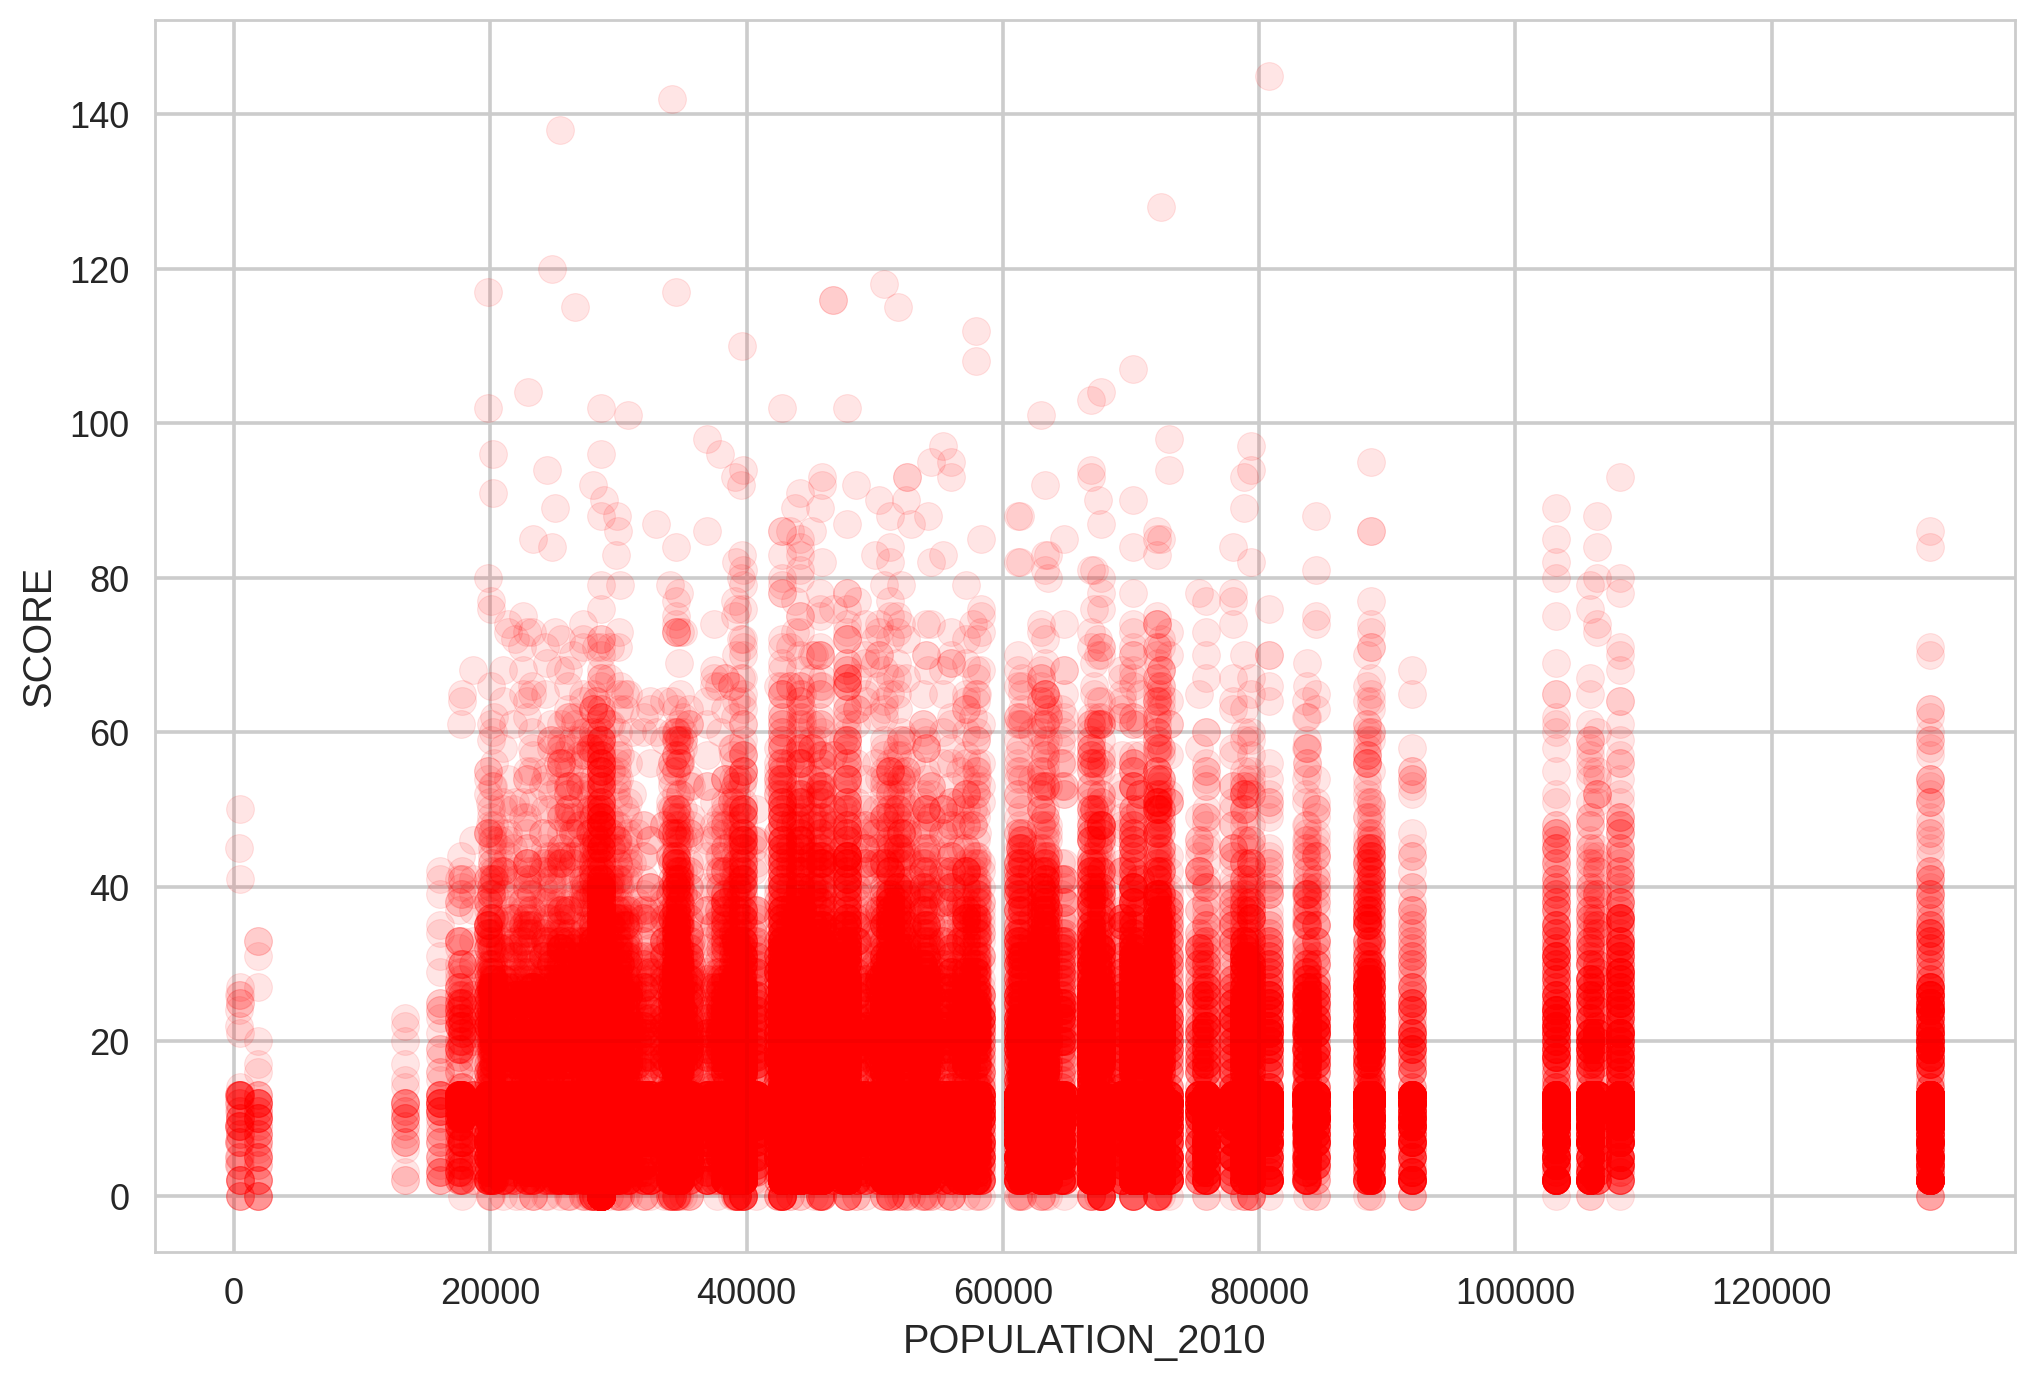

In [103]:
#plot
merged.plot(kind='scatter', x='POPULATION_2010', y='SCORE', alpha=0.1, figsize=(12,8), s=100, c='red')

## Calculate aggregates per groups

In [104]:
#calc the avg of the "score" variable, group by neigborhood name
merged.groupby('NTA_NAME')['SCORE'].mean()

,SCORE
NTA_NAME,
Allerton-Pelham Gardens,16.349206
Annadale-Huguenot-Prince's Bay-Eltingville,13.925373
Arden Heights,10.333333
Astoria,15.671447
Auburndale,16.618421
...,...
Yorkville,17.218563
park-cemetery-etc-Bronx,10.372093
park-cemetery-etc-Brooklyn,12.521739


In [105]:
# create avg and sort values
merged.groupby('NTA_NAME')['SCORE'].mean().sort_values(ascending=False)

,SCORE
NTA_NAME,
Elmhurst-Maspeth,22.578125
East Harlem South,20.337900
Williamsbridge-Olinville,20.267606
Flushing,20.217968
South Jamaica,19.945455
...,...
park-cemetery-etc-Queens,11.414634
Starrett City,10.851852
park-cemetery-etc-Bronx,10.372093


In [106]:
# calc the avg score per pop
merged.groupby('POPULATION_2010')['SCORE'].mean()

,SCORE
POPULATION_2010,
418.0,12.521739
436.0,11.414634
1849.0,7.000000
1906.0,10.372093
13354.0,10.851852
...,...
103169.0,17.712215
105804.0,16.301663
106357.0,18.826923


In [107]:
#calc the avg score per neighborhood
# using the reset_index() which converts the series (single column df) to a df

grouped_df = merged.groupby('POPULATION_2010')['SCORE'].mean().reset_index()
grouped_df

,POPULATION_2010,SCORE
0,418.0,12.521739
1,436.0,11.414634
2,1849.0,7.000000
3,1906.0,10.372093
4,13354.0,10.851852
...,...,...
186,103169.0,17.712215
187,105804.0,16.301663
188,106357.0,18.826923
189,108152.0,18.163121


<Axes: xlabel='POPULATION_2010', ylabel='SCORE'>

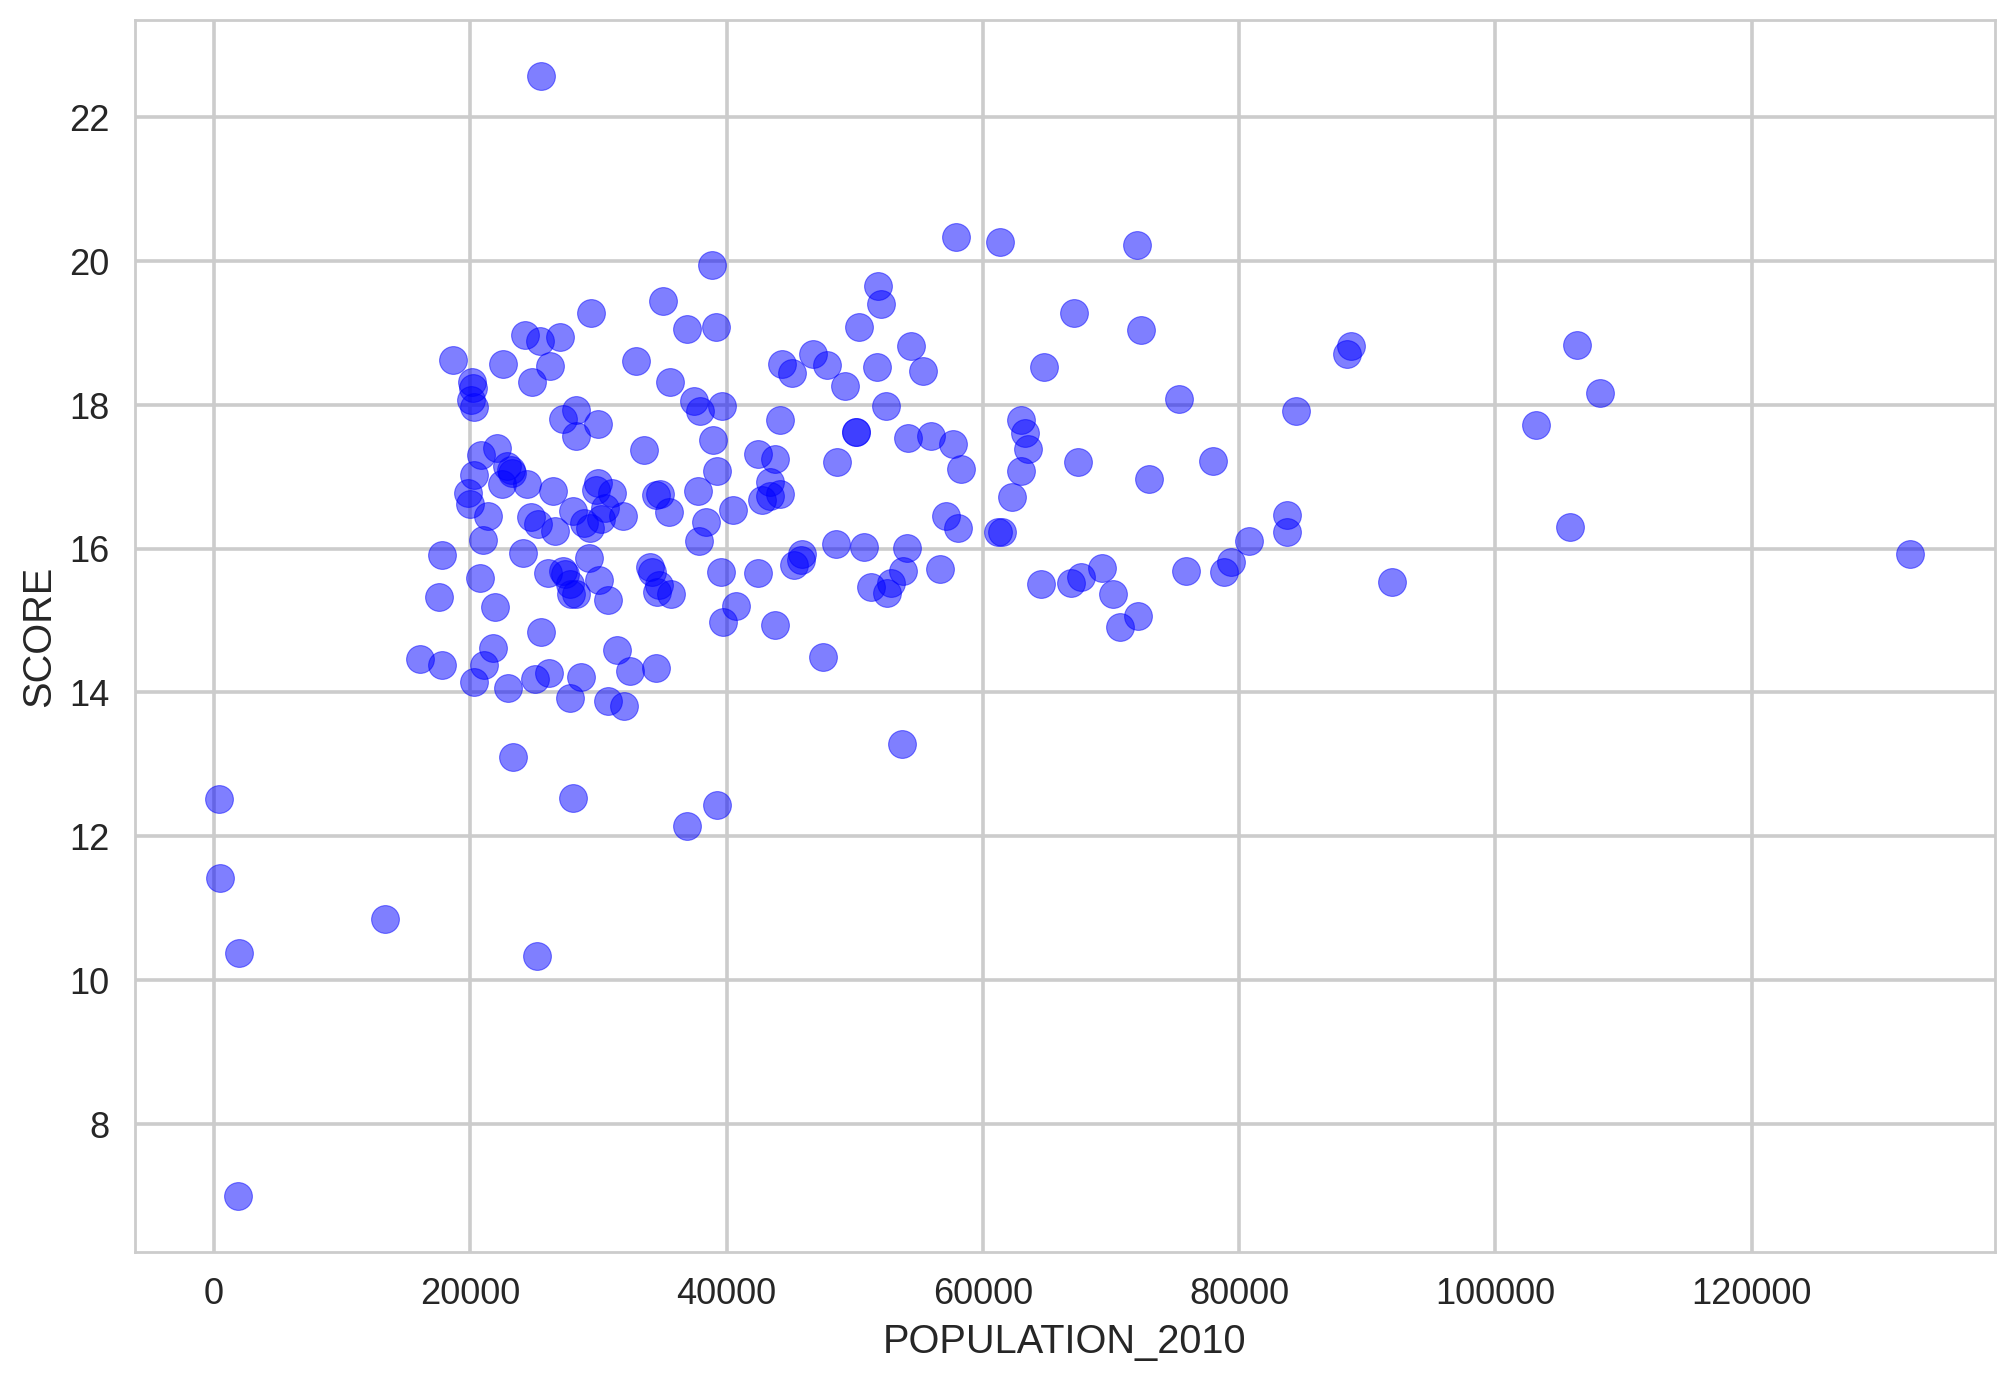

In [110]:
grouped_df.plot(kind='scatter', x='POPULATION_2010', y='SCORE', alpha=0.5, figsize=(12,8), s=100, c='blue')

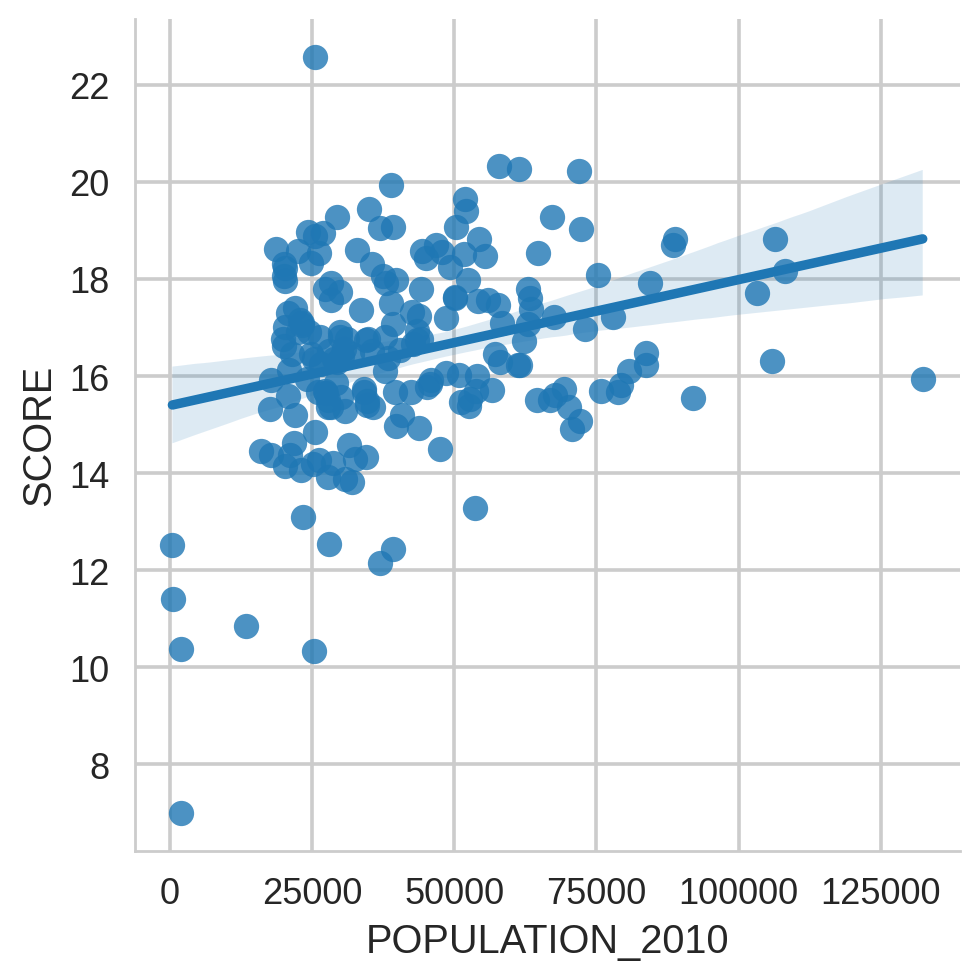

In [111]:
#use "seaborn" a visualization lib to create a better version
# add regression line
# https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.lmplot(data=grouped_df, x='POPULATION_2010', y='SCORE')

In [116]:
# count how many inspections per neighborhood
grouped_ins = merged.groupby('NTA_NAME')['CAMIS'].count().sort_values(ascending=False)
grouped_ins

,CAMIS
NTA_NAME,
Midtown-Midtown South,3007
SoHo-TriBeCa-Civic Center-Little Italy,1428
West Village,1392
Hudson Yards-Chelsea-Flat Iron-Union Square,1346
Chinatown,1073
...,...
Starrett City,27
park-cemetery-etc-Brooklyn,23
Grymes Hill-Clifton-Fox Hills,20


#Multi aggregations per group agg() func

In [117]:
(
    merged
    .groupby('NTA_NAME')
    .agg(
        score_mean = ('SCORE', 'mean'),    #calc the mean/avg of the score
        inspections = ('CAMIS', 'count'),  # counts the num of insp
        graded_rest = ('CAMIS', 'nunique')  # counts unique rest ids
    )
    .sort_values(by = 'inspections', ascending = False)    #sorts in desc order of insp
    .tail(20)  #shows the last 20 lines
)

,score_mean,inspections,graded_rest
NTA_NAME,,,
Claremont-Bathgate,16.771930,57,26
South Jamaica,19.945455,55,19
Queensboro Hill,17.296296,54,24
Highbridge,16.800000,50,22
Springfield Gardens North,18.880000,50,19
Cambria Heights,18.625000,48,19
Kingsbridge Heights,16.702128,47,21
park-cemetery-etc-Bronx,10.372093,43,19
Crotona Park East,14.139535,43,17


In [118]:
(
  inspections
  .groupby('INSPECTION_DATE')
  .agg(
    score_mean = ('SCORE', 'mean'), # calculate the mean of the score
    graded_restaurants = ('CAMIS', 'nunique') # count unique restaurant IDs
  )
  .tail(20) # show the last 20 lines
)

,score_mean,graded_restaurants
INSPECTION_DATE,,
2024-04-30,16.472727,55
2024-05-01,15.602740,73
2024-05-02,15.479167,96
2024-05-03,16.825000,40
2024-05-06,17.868687,99
2024-05-07,18.515464,97
2024-05-08,20.141304,92
2024-05-09,15.557692,104
2024-05-10,16.632653,49


<Axes: xlabel='INSPECTION_DATE'>

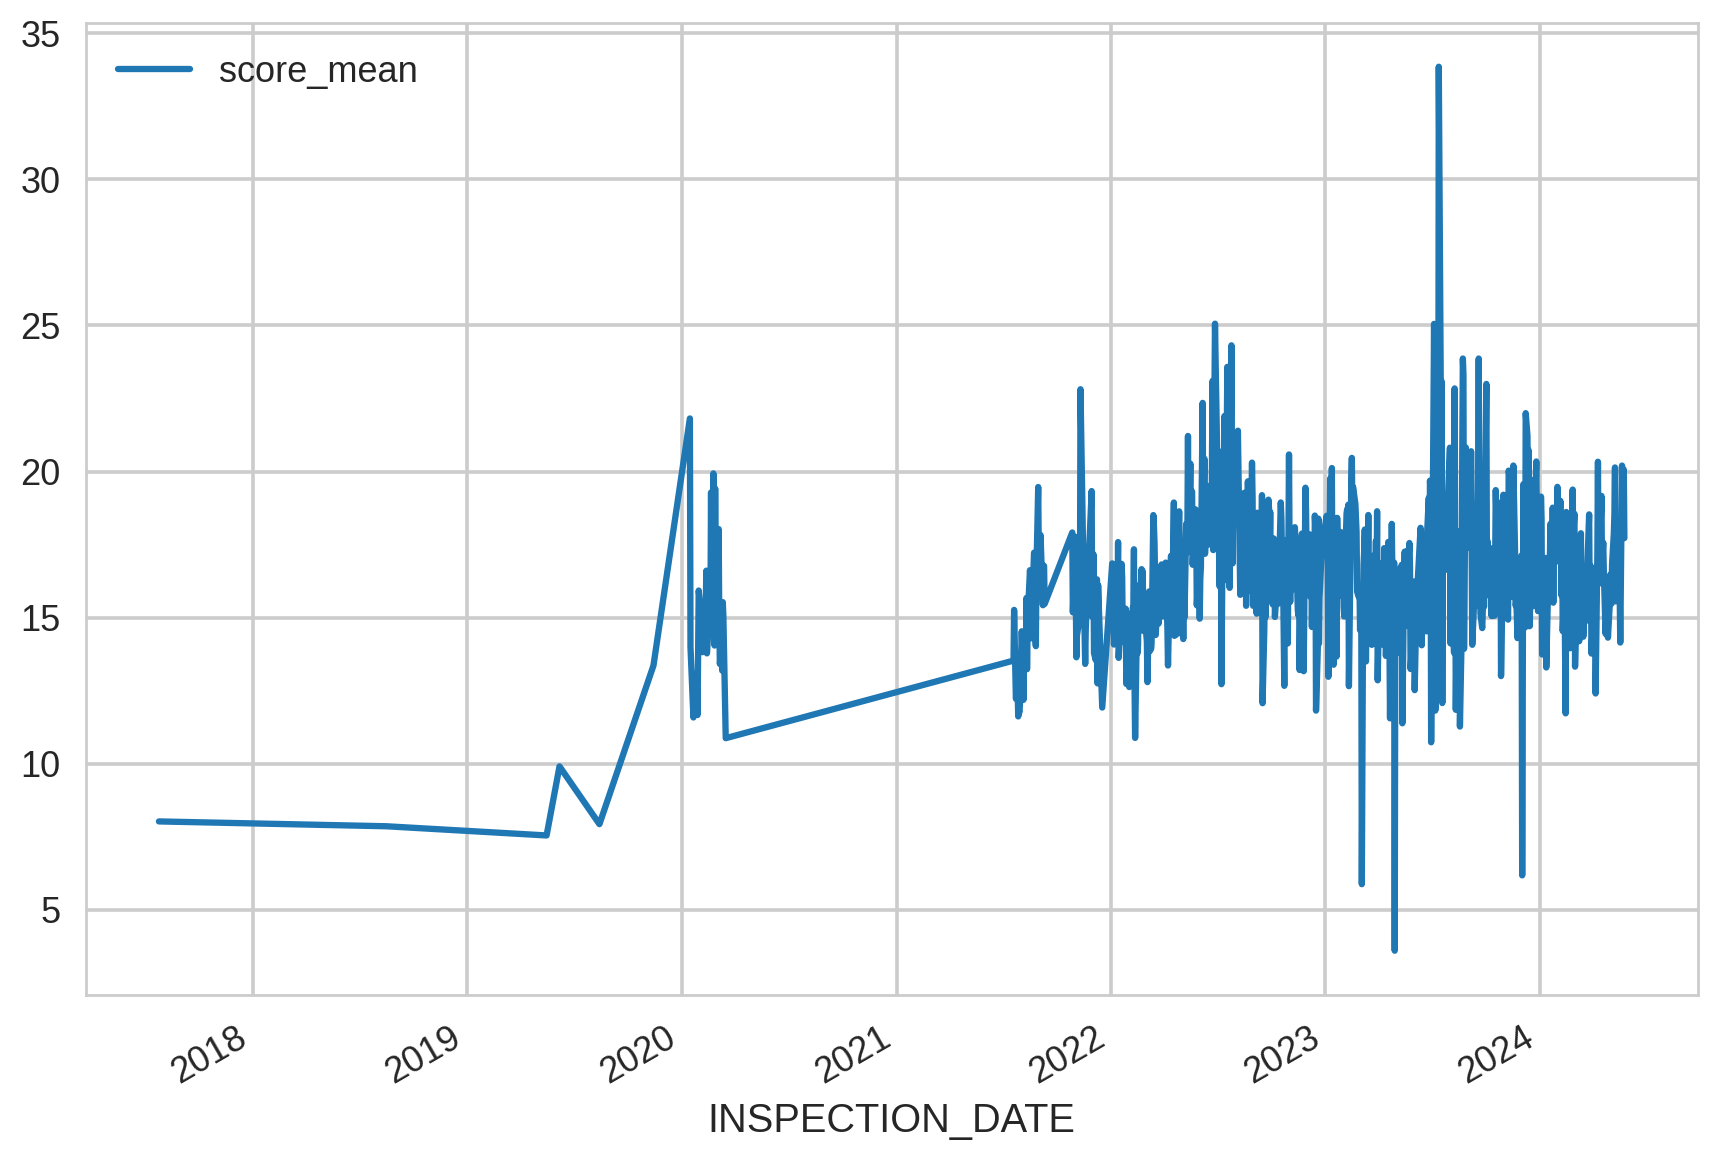

In [119]:
(
  inspections
  .groupby('INSPECTION_DATE')
  .agg(
    score_mean = ('SCORE', 'mean'), # calculate the aveage score for the date
    graded_restaurants = ('CAMIS', 'nunique') # and the number of restaurants
  )
  .query('graded_restaurants>10') # keep only days with at least 10 graded restauranta
  .filter(items=['score_mean']) # we only want to plot the score
  .plot()
)


<ipython-input-120-3c0b87242719>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('1M').mean() # change the frequency to 1 month, and show avg score per month


<Axes: xlabel='INSPECTION_DATE'>

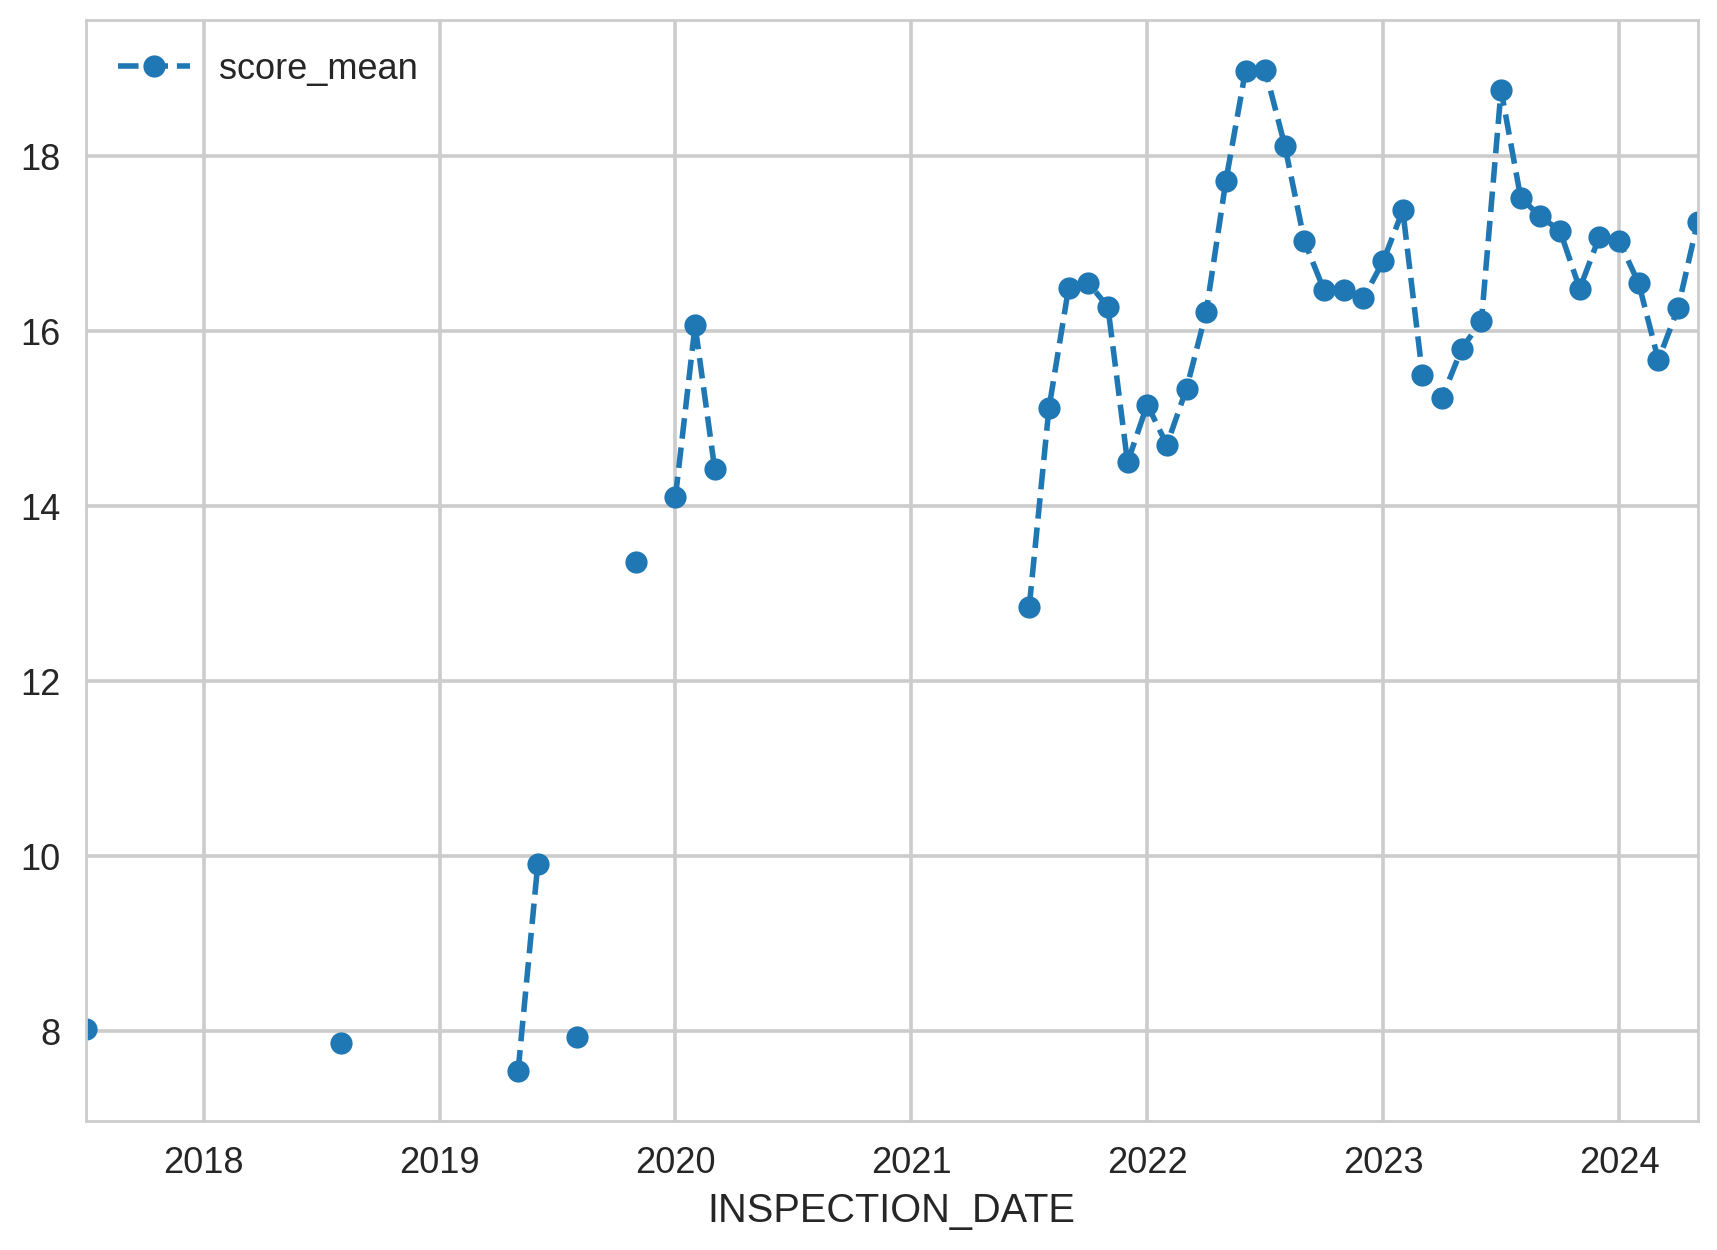

In [120]:
(
  inspections
  .groupby('INSPECTION_DATE')
  .agg(
    score_mean = ('SCORE', 'mean'), # calculate the aveage score for the date
    graded_restaurants = ('CAMIS', 'nunique') # and the number of restaurants
  )
  .query('graded_restaurants>10') # keep only days with at least 10 graded restauranta
  .filter(items=['score_mean']) # we only want to plot the score
  .resample('1M').mean() # change the frequency to 1 month, and show avg score per month
  .plot(
    style='--o', # use a dotted line and circles as markers
    linewidth=2, # the line should be 1 pixel wide
    markersize=8, # the marker size set to 8
  )
)

#Aggregation func "agg()"

In [121]:
# avg aggregation
inspections['SCORE'].agg('mean')

16.412393207246165

In [123]:
# multiple aggregations
inspections.agg(
    {
        'SCORE': ['mean', 'min', 'max', 'std', 'count', 'median', 'nunique'],
        'CAMIS': ['nunique', 'count']
    }
)

,SCORE,CAMIS
mean,16.412393,NaN
min,0.000000,NaN
max,145.000000,NaN
std,12.691489,NaN
count,47639.000000,47639.0
median,12.000000,NaN
nunique,115.000000,19742.0


In [124]:
inspections.agg(
        num_scored_violations = ('SCORE', 'count'),
        mean_score = ('SCORE', 'mean'),
        std_score  = ('SCORE', 'std'),
        num_entries = ('CAMIS',  'count'),
        num_restaurants = ('CAMIS',  'nunique'),
  )

,SCORE,CAMIS
num_scored_violations,47639.000000,NaN
mean_score,16.412393,NaN
std_score,12.691489,NaN
num_entries,NaN,47639.0
num_restaurants,NaN,19742.0
